## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd

import numpy as np

import random

import matplotlib.pyplot as plt

%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up

random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#import the dataset

df = pd.read_csv('ab_data.csv')

#use 7 rows in first

df.head(7)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#show the total number of rows

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
#show the number of unique user

df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
#show the number of unique user

df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
#show the number of the converted users

prop_converted_us = df.converted.mean()

prop_converted_us

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
#number of times the `new_page` and `treatment` don't match.

(df.query('group == "treatment" & landing_page == "old_page"')['user_id'].count()) + (df.query('group == "control" & landing_page == "new_page"')['user_id'].count())

3893

f. Do any of the rows have missing values?

In [8]:
#check any missing value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#remove the mismatch rows

df1 = df.query('group == "treatment" & landing_page == "new_page"')

df2 = df.query('group == "control" & landing_page == "old_page"')

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [11]:
#import the dataset

df = pd.read_csv('ab_data.csv')

#use 7 rows in first

df.head(7)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


a. How many unique **user_id**s are in **df2**?

In [13]:
# know unique user_id

df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#above

df2.groupby(['group'],as_index=False).mean()

,group,user_id,converted
0,control,788164.072594,0.120386


c. What is the row information for the repeat **user_id**? 

# duplicated user_id rows 788164


information found above, information found above, rows 788164

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#remove one of the duplicated rows

#check that only one of the duplicated rows is removed,

#but the other one is still in the dataframe

df2.shape

(145274, 5)

In [16]:
#verify if number of rows have been drop by one

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145274 entries, 0 to 294476
Data columns (total 5 columns):
user_id         145274 non-null int64
timestamp       145274 non-null object
group           145274 non-null object
landing_page    145274 non-null object
converted       145274 non-null int64
dtypes: int64(2), object(3)
memory usage: 6.7+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
#know averga of the converted column 

df.converted.value_counts()[1]/len(df.index)

0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
#view the probability of the converted rate for both control and treatment

#by applying method

df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
#as above

df2.groupby(["group", "converted"]).converted.mean()

group    converted
control  0            0
         1            1
Name: converted, dtype: int64

d. What is the probability that an individual received the new page?

In [20]:
#in order to obtain the probability that an individual that received the new_page

df2.landing_page.value_counts()[0]/len(df.index)

0.49332717554452288

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

# No, 

We don't have enough evidence that the new page give more conversions.

The test designed very good . the old_page and the new_pagewas divided to half between population . The population is considerable (290,584 users).

12.04% who received the old_page were converted. 
11.88% who received the new_page were converted. 
In conclusion, the new_page did not increase the conversion rate.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

# Null hypothesis: 

the conversion rate of the old_page is greater or the same than the conversion rate of the newpage.$p_{new}$ <= $p_{old}$

Alternative hypothesis: the conversion rate of the old_page is less than the conversion rate of the newpage. $p_{new}$ > $p_{old}$

$H_{0}$: $p_{new}$ <= $p_{old}$

$H_{1}$: $p_{new}$ > $p_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
#p_new converted 

p_new = df2.converted.mean()

print(p_new)

0.1203863045


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
#p_old converted 

p_old = df2.converted.mean()

print(p_old)

0.1203863045


c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
#calculate the number of users landed and new_page

n_new = df2.landing_page.value_counts()[0]

n_new

145274

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = df2.query('group == "control"').shape[0]

n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#calculate the number of users landed and new_page

new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])

new_page_converted.mean()

0.87961369549953883

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#calculate the number of users landed and old_page

old_page_converted = np.random.choice(2, size=n_new ,p=[p_old,1 - p_old])

old_page_converted.mean()

0.8808733840879992

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
# difference in simulated values

diff = new_page_converted.mean() - old_page_converted.mean()

print(diff)

-0.00125968858846


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
# 10000 of p_new and p_old

# Simulation via binomial distribution

p_diffs = []

new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new

old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old

p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    7.,    59.,   356.,  1336.,  2592.,  2977.,  1792.,   707.,
          161.,    13.]),
 array([-0.00483225, -0.00390159, -0.00297094, -0.00204028, -0.00110963,
        -0.00017897,  0.00075168,  0.00168234,  0.00261299,  0.00354365,
         0.0044743 ]),
 <a list of 10 Patch objects>)

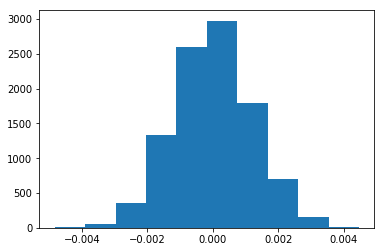

In [29]:
# convert to numpy array

plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
actual_diff = df2.query('landing_page == "new_page"').converted.mean() 

df2.query('landing_page == "old_page"').converted.mean()
    
(p_diffs > actual_diff).mean()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """


0.0

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

# 0.0% is proportion of the p_diffs that are greater than the actual difference observed in ab_data.csv. 

we cannot refuse the null hypothesis and that we don't have enough evidence that the new_page has a higher conversion rate than the old_page.

This value means that we cannot reject the null hypothesis we find that there is no conversion advantage in the new page.

In conclude that null hypothesis is true as old and new perform almolst the same. but in the same time the stastic show that the old page is better than the new page 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

df2.head()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [32]:
import statsmodels.api as smذ

new_page_converted = np.random.binomial(n_new,p_new)

old_page_converted = np.random.binomial(n_old, p_old)

n_old = df2.query("group == 'control'").shape[0]

n_new = df2.query("group == 'treatment'").shape[0]

In [33]:
new_page_converted, old_page_converted

(17317, 17618)

In [34]:
n_old, n_new

(145274, 0)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [35]:
z_score, p_value = sm.stats.proportions_ztest([new_page_converted, old_page_converted], [n_old, n_new], alternative='smaller')

z_score, p_value

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/proportion.py:786: RuntimeWarning: divide by zero encountered in true_divide
  prop = count * 1. / nobs
/opt/conda/lib/python3.6/site-packages/statsmodels/stats/proportion.py:802: RuntimeWarning: divide by zero encountered in true_divide
  nobs_fact = np.sum(1. / nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/stats/weightstats.py:670: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std_diff


(nan, nan)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

# The z-score and the p_value mean that one doesn't reject the Null. 

The Null being the converted rate of the old_page is the same or greater than the converted rate of the new_page. 

in conclusion, That means we can not be confident that the converted rate of the new_page is larger than the old_page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

# This is a logistic regression, since we want to know the chances of change, instead of a direct figure.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# new intercept 

df2['intercept']=1

# checking a few rows

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1


In [37]:
# adding columns from get_dummies

n_old = df2.query('group == "control"').shape[0]

# show a few rows

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
#regression model 

import statsmodels.api as sm

model = sm.Logit(df2.converted, df2[['intercept']])

results =  model.fit()

results = model.fit()

Optimization terminated successfully.
         Current function value: 0.367694
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.367694
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

# Depends on all variables constant. This means that the old page and new page are both equal in chance of converting users.
 
 Holding all other variables constant, the number of converted is 1.015 times more likely to be converted than those that are not converted. This means that the old page and new page are both equal in chance of converting users. We should not assume that the new page is better than the old page.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

# The p-value found in the logistic regression model

is different than what we found in parts j and k because our null and alternative hypthesis model assumed that there is an equal probability of the old and new page converting users.

Alternative hypothesis from part II: the conversion rate of the old_page is less than the conversion rate of the new_page. This assumes a one-tailed test.

# In Part III,

(1) The landing_page type influences positively the conversion rate or 
(2) the conversion rate of the old_page is different to the conversion rate of the new_page. 

# Our hypothesis here is:
$H_{0}$ : $p_{new}$ - $p_{old}$ = 0
$H_{1}$ : $p_{new}$ - $p_{old}$ != 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

# not appear that the treatment or control page has much impact on whether a user converts. 

It is important to be when selecting factors to make sure the factors are not in and of themselves colinear.

It is a good idea to consider other factors in order to identify other potencial influences on the conversion rate.

A disadvantage is that the model gets more complex.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

# The country that a user is in does not affect the conversion rate. 

We can determine this by figuring out the conversion rate of each of the countries. US: 0.1195 UK: 0.1206 CA: 0.1153 These are approximately all the same. We fail to reject the null hypothesis.

In [39]:
countries_df = pd.read_csv('./countries.csv')

countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
countries_df.head()

countries_df.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [41]:
#mean of conversion rate

countries_df.mean()

user_id    788004.876222
dtype: float64

In [42]:
#mean conversion rate by country

countries_df.groupby(['country'], as_index=False).mean()

,country,user_id
0,CA,788640.270639
1,UK,787678.848246
2,US,788075.662148


In [43]:
# Create the necessary dummy variables

countries_df[['CA','UK', 'US']]= pd.get_dummies(countries_df['country'])

countries_df.head()

,user_id,country,CA,UK,US
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


# The country does not appear to have influence on the convertion rate. 

P-values for the two dummy country variables are above 0.05. Note the CA variable get closes to 0.05.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
#mean conversion rate by country and landing_page 

countries_df.groupby(['country'], as_index=False).mean()

,country,user_id,CA,UK,US
0,CA,788640.270639,1,0,0
1,UK,787678.848246,0,1,0
2,US,788075.662148,0,0,1


# By looking at an interaction,

I will explore whether the influence of the landing_page might work in the US but not in the other countries, or Canada but not in other countries. Or the other way around.

In [45]:
countries_df.head()

countries_df['interaction_us_countries_df'] = countries_df.US 

countries_df['interaction_ca_countries_df'] = countries_df.CA 

countries_df.head()

,user_id,country,CA,UK,US,interaction_us_countries_df,interaction_ca_countries_df
0,834778,UK,0,1,0,0,0
1,928468,US,0,0,1,1,0
2,822059,UK,0,1,0,0,0
3,711597,UK,0,1,0,0,0
4,710616,UK,0,1,0,0,0


In [46]:
import statsmodels.api as sm

countries_df['intercept'] = 1

model = sm.Logit(df2.converted, df2[['intercept']])

results =  model.fit()

Optimization terminated successfully.
         Current function value: 0.367694
         Iterations 6


# Summary and conclusion on regression

The p_value for both interaction terms is higher than 0.05.

the influence of landing_page in the US , Canada is not different to the influence of landing_page in the other countries.

# In conclusion,

there is not enough evidence that the new_page increases the conversion rate as compared to the old_page. This is based on the probability figures, A/B testand regression. There is no strong evidence that the countries (US, CA and UK) influence the conversion rate.

Since the sample size is large continuing the testing of the new_page is likely not necessary. It is best to focus on the development of another new landing page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0